In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
# Step 2: Load the dataset
data = pd.read_csv('irisdata.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
data.head()


First 5 rows of the dataset:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check basic info
print("Dataset info:")
data.info()

# Check for null values
print("Null values in dataset:")
print(data.isnull().sum())

# Summary statistics
print("Statistical summary:")
data.describe()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Null values in dataset:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Statistical summary:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


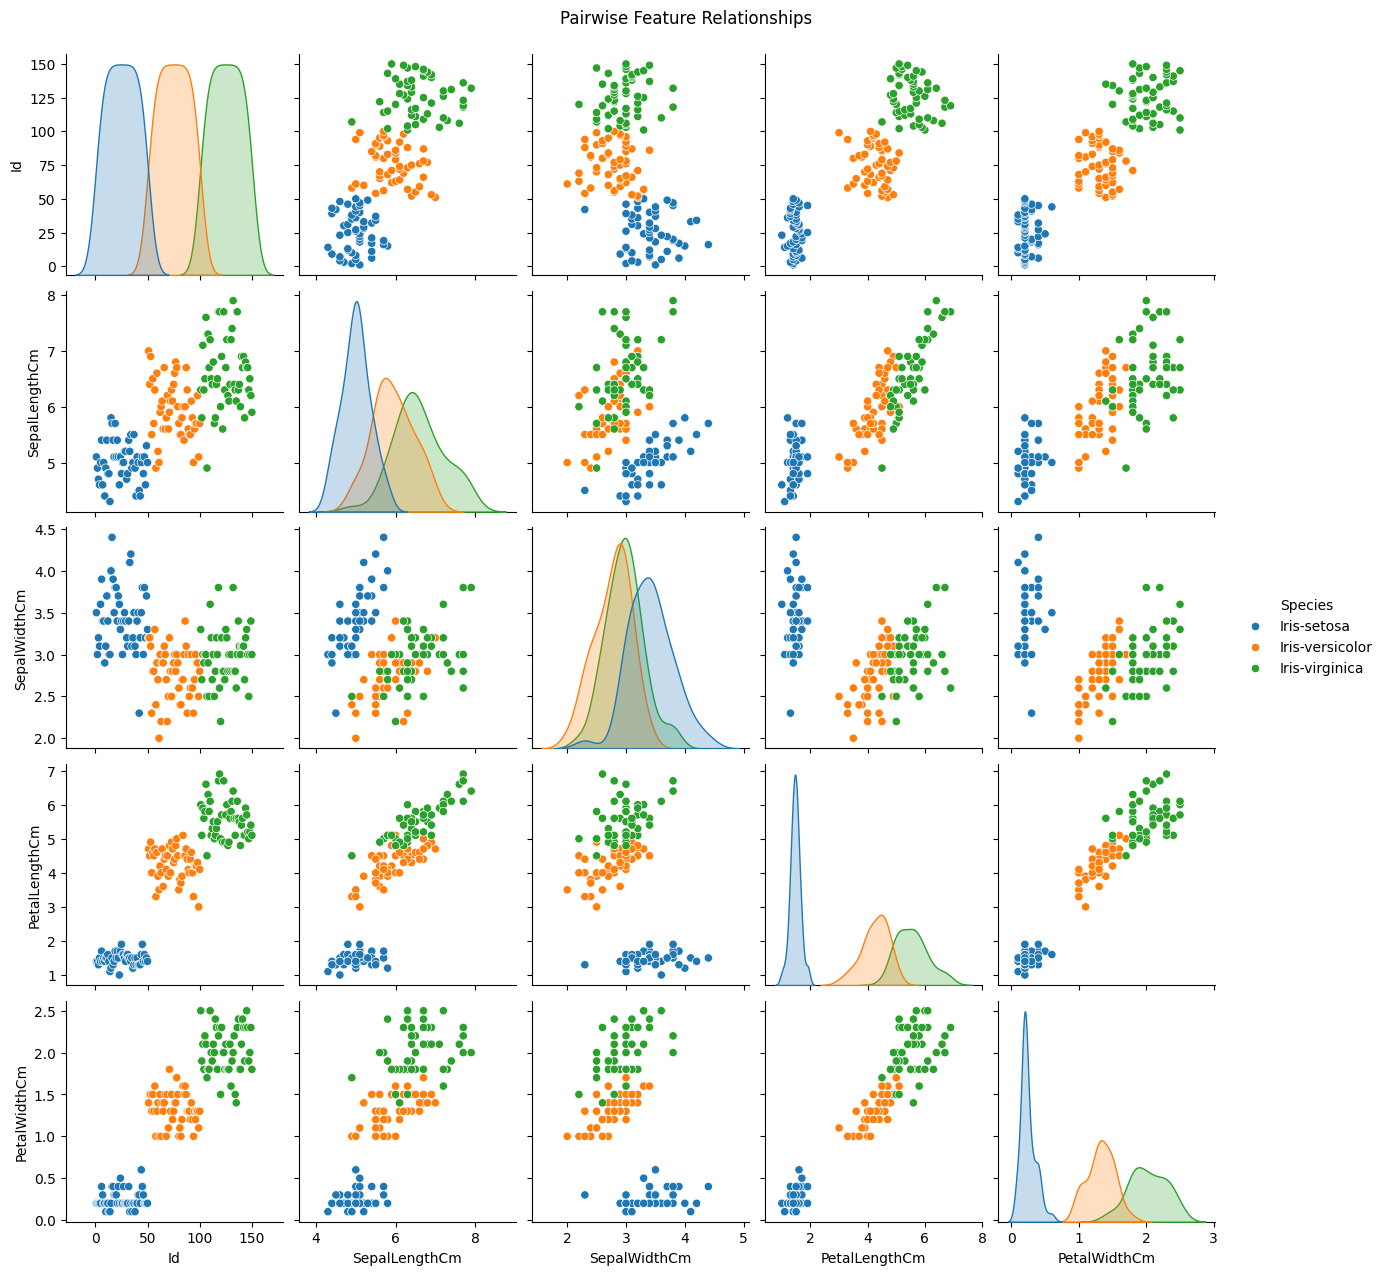

In [5]:
# Pair plot for visualization
sns.pairplot(data, hue='Species')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


In [6]:
# Step 6: Prepare the data for training

# Features and labels
X = data.drop('Species', axis=1)  # Replace with actual species column name if different
y = data['Species']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 120, Testing samples: 30


In [7]:
# Step 7: Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


Accuracy: 1.00


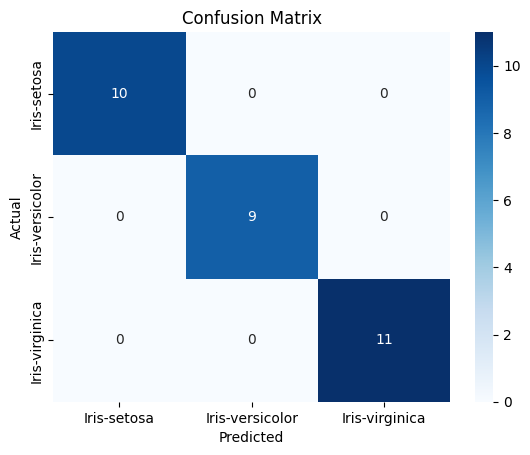

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [8]:
# Step 8: Make predictions and evaluate
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


In [9]:
# Step 9: Predict on test data and compare results

# Predict the species
predicted_classes = model.predict(X_test)

# Convert encoded labels back to species names
actual_species = le.inverse_transform(y_test)
predicted_species = le.inverse_transform(predicted_classes)

# Create a DataFrame to show actual vs predicted
comparison_df = pd.DataFrame({
    'SepalLength': X_test.iloc[:, 0].values,
    'SepalWidth': X_test.iloc[:, 1].values,
    'PetalLength': X_test.iloc[:, 2].values,
    'PetalWidth': X_test.iloc[:, 3].values,
    'Actual Species': actual_species,
    'Predicted Species': predicted_species
})

# Display first 10 predictions
print("Actual vs Predicted Species (first 10 samples):")
display(comparison_df.head(10))


Actual vs Predicted Species (first 10 samples):


,SepalLength,SepalWidth,PetalLength,PetalWidth,Actual Species,Predicted Species
0,74,6.1,2.8,4.7,Iris-versicolor,Iris-versicolor
1,19,5.7,3.8,1.7,Iris-setosa,Iris-setosa
2,119,7.7,2.6,6.9,Iris-virginica,Iris-virginica
3,79,6.0,2.9,4.5,Iris-versicolor,Iris-versicolor
4,77,6.8,2.8,4.8,Iris-versicolor,Iris-versicolor
5,32,5.4,3.4,1.5,Iris-setosa,Iris-setosa
6,65,5.6,2.9,3.6,Iris-versicolor,Iris-versicolor
7,142,6.9,3.1,5.1,Iris-virginica,Iris-virginica
8,69,6.2,2.2,4.5,Iris-versicolor,Iris-versicolor
9,83,5.8,2.7,3.9,Iris-versicolor,Iris-versicolor
